In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 파일확인

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'EPC_after.csv',
 'FPS_after.csv',
 'MZ.ipynb',
 'MZ_0.csv',
 'MZ_10.csv',
 'MZ_15.csv',
 'MZ_20.csv',
 'MZ_25.csv',
 'MZ_30.csv',
 'MZ_35.csv',
 'MZ_40.csv',
 'MZ_45.csv',
 'MZ_5.csv',
 'MZ_50.csv',
 'MZ_55.csv',
 'MZ_60.csv',
 'MZ_65.csv',
 'MZ_70.csv',
 'MZ_75.csv',
 'test.csv',
 'VDL_after.csv',
 'VDL_before.csv',
 'VOA_after.csv',
 'VOA_before.csv']

# Loss 확인

## VOA loss

In [45]:
df_voa_bef = pd.read_csv('VOA_before.csv', encoding = 'utf8', header = 12)
df_voa_af = pd.read_csv("VOA_after.csv", encoding = 'utf8', header =12)

df_voa_bef.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)
df_voa_af.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)

df_voa_loss = df_voa_af/df_voa_bef

df_voa_loss['Power (W)'].mean()

0.8177943493442936

### -0.87 dB

## EPC loss

In [49]:
df_EPC_after = pd.read_csv("EPC_after.csv", encoding = 'utf8', header = 12)
df_EPC_after.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)

df_EPC_loss = df_EPC_after / df_voa_af

df_EPC_loss['Power (W)'].mean()

0.8916319244073014

### -0.50 dB

## VDL loss

In [54]:
df_VDL_bef = pd.read_csv('VDL_before.csv', encoding = 'utf8', header = 12)
df_VDL_af = pd.read_csv("VDL_after.csv", encoding = 'utf8', header =12)

df_VDL_bef.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)
df_VDL_af.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)

df_VDL_loss = df_VDL_af/df_VDL_bef

df_VDL_loss['Power (W)'].mean()

0.5993030093643018

### -2.22 dB

## FPS loss

In [58]:
df_FPS_after = pd.read_csv("FPS_after.csv", encoding = 'utf8', header = 12)
df_FPS_after.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 4"], inplace = True)

df_FPS_loss = df_FPS_after / df_VDL_af

df_FPS_loss['Power (W)'].mean()

0.3030958656397699

### -5.18 dB

# Envelope 확인

In [18]:
ps = 0

max_no_corr = []
min_no_corr = []
max_list = []
min_list = []

while (ps <= 75):
    file_name = f"MZ_{ps}.csv"
    
    df = pd.read_csv(file_name, encoding = 'utf-8', header =12)
    df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
    df.rename(columns = {"Power (W)" : "signal",
                         "Power (W).1" : 'pump'}, inplace = True)
    df['signal_per_pump'] = df['signal']/df['pump']
    
    sigpmp_max_idx = df.signal_per_pump.idxmax()
    sigpmp_min_idx = df.signal_per_pump.idxmin()
    max = df.iloc[sigpmp_max_idx].signal_per_pump
    min = df.iloc[sigpmp_min_idx].signal_per_pump

    max_no_corr.append(df.signal.max())
    min_no_corr.append(df.signal.min())
    
    max_list.append(max)
    min_list.append(min)
    

    ps += 5

## 보정 전

In [26]:
len(max_list)

16

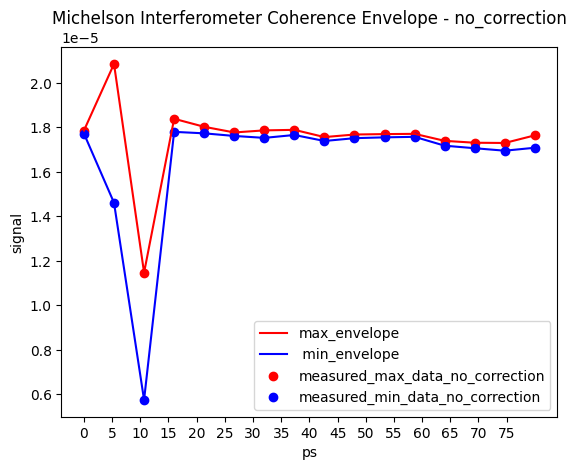

In [30]:


x = np.linspace(0, 80, 16)
plt.plot(x, max_no_corr, c= 'r', label = 'max_envelope')
plt.plot(x, min_no_corr, c = 'b', label = ' min_envelope')
plt.scatter(x, max_no_corr, c= 'r', label = 'measured_max_data_no_correction')
plt.scatter(x, min_no_corr, c= 'b', label = 'measured_min_data_no_correction')

plt.xticks(np.arange(0, 80, 5))
plt.xlabel('ps')
plt.ylabel("signal")
plt.title("Michelson Interferometer Coherence Envelope - no_correction")

plt.legend()
plt.show()

## 보정 후 

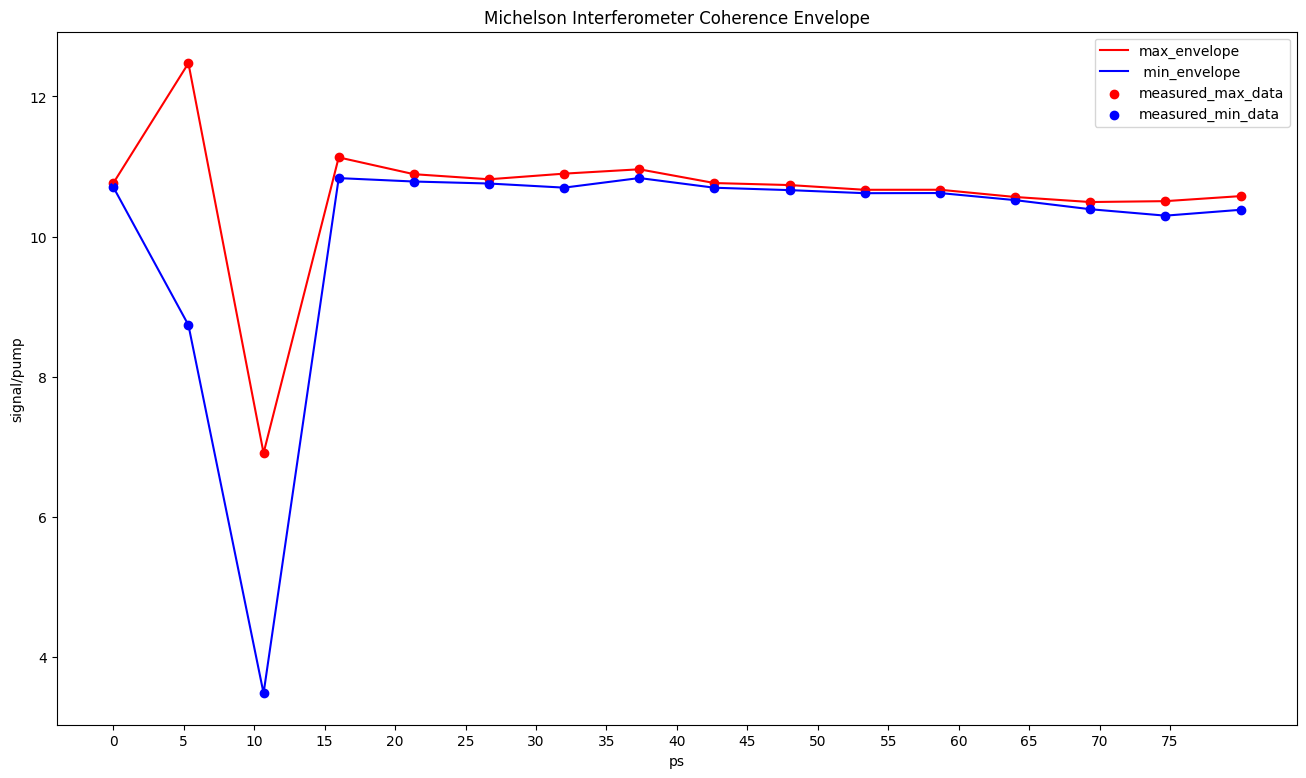

In [32]:
plt.figure(figsize = (16,9))

x = np.linspace(0, 80, 16)
plt.plot(x, max_list, c= 'r', label = 'max_envelope')
plt.plot(x, min_list, c = 'b', label = ' min_envelope')
plt.scatter(x, max_list, c= 'r', label = 'measured_max_data')
plt.scatter(x, min_list, c= 'b', label = 'measured_min_data')

plt.xticks(np.arange(0, 80, 5))
plt.xlabel('ps')
plt.ylabel("signal/pump")
plt.title("Michelson Interferometer Coherence Envelope")

plt.legend()
plt.show()

# 0~20 PS를 1PS 간격으로 측정

In [113]:
os.chdir('..')
os.chdir('MZ_1PS')
os.listdir()

['MZ_0.csv',
 'MZ_1.csv',
 'MZ_10.csv',
 'MZ_11.csv',
 'MZ_12.csv',
 'MZ_13.csv',
 'MZ_14.csv',
 'MZ_15.csv',
 'MZ_16.csv',
 'MZ_17.csv',
 'MZ_18.csv',
 'MZ_19.csv',
 'MZ_2.csv',
 'MZ_20.csv',
 'MZ_3.csv',
 'MZ_4.csv',
 'MZ_5.csv',
 'MZ_6.csv',
 'MZ_7.csv',
 'MZ_8.csv',
 'MZ_9.csv']

In [115]:
ps = 0

max_no_corr = []
min_no_corr = []
max_list = []
min_list = []

while (ps <= 20):
    file_name = f"MZ_{ps}.csv"
    
    df = pd.read_csv(file_name, encoding = 'utf-8', header =12)
    df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
    df.rename(columns = {"Power (W)" : "signal",
                         "Power (W).1" : 'pump'}, inplace = True)
    df['signal_per_pump'] = df['signal']/df['pump']
    
    sigpmp_max_idx = df.signal_per_pump.idxmax()
    sigpmp_min_idx = df.signal_per_pump.idxmin()
    max = df.iloc[sigpmp_max_idx].signal_per_pump
    min = df.iloc[sigpmp_min_idx].signal_per_pump

    max_no_corr.append(df.signal.max())
    min_no_corr.append(df.signal.min())
    
    max_list.append(max)
    min_list.append(min)
    

    ps += 1

## 보정 전

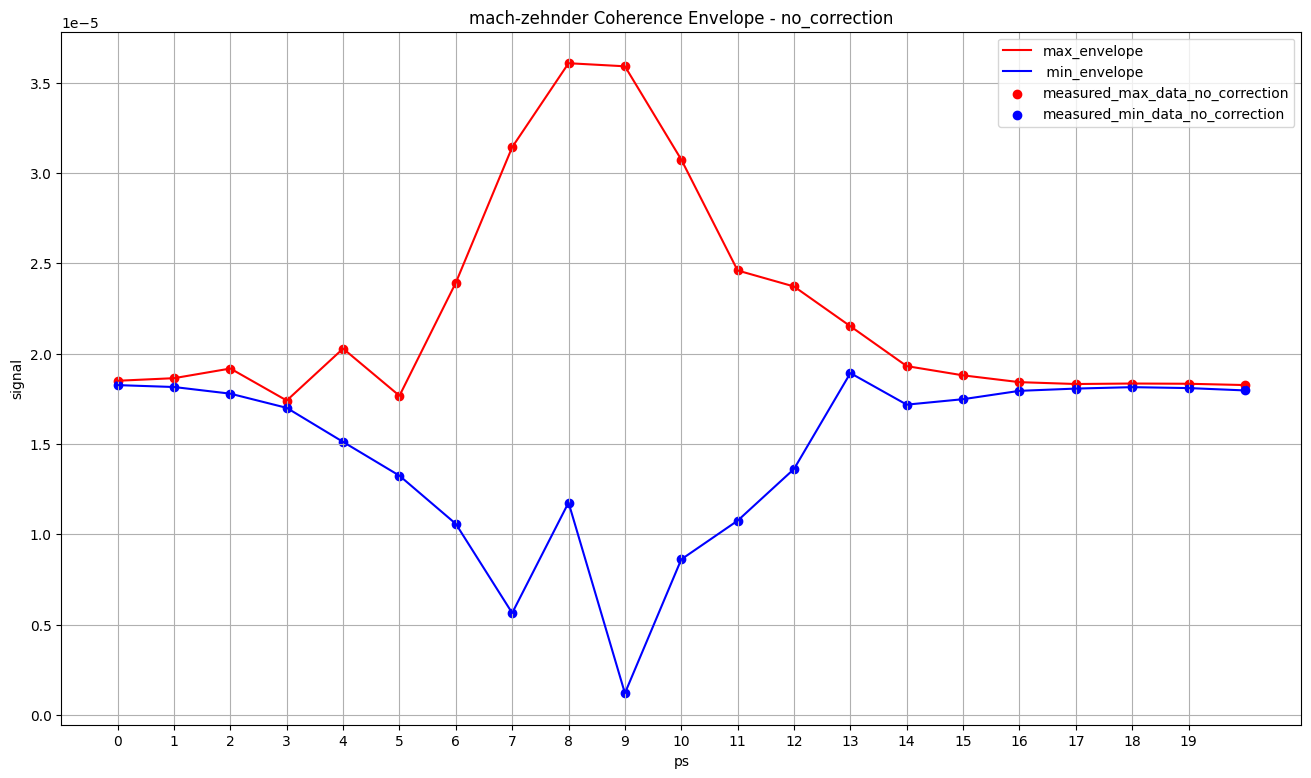

In [138]:
plt.figure(figsize = (16,9))

x = np.linspace(0, 20, 21)
plt.plot(x, max_no_corr, c= 'r', label = 'max_envelope')
plt.plot(x, min_no_corr, c = 'b', label = ' min_envelope')
plt.scatter(x, max_no_corr, c= 'r', label = 'measured_max_data_no_correction')
plt.scatter(x, min_no_corr, c= 'b', label = 'measured_min_data_no_correction')

plt.xticks(np.arange(0, 20, 1))
plt.xlabel('ps')
plt.ylabel("signal")
plt.title("mach-zehnder Coherence Envelope - no_correction")

plt.grid()
plt.legend()
plt.show()

## 보정 후

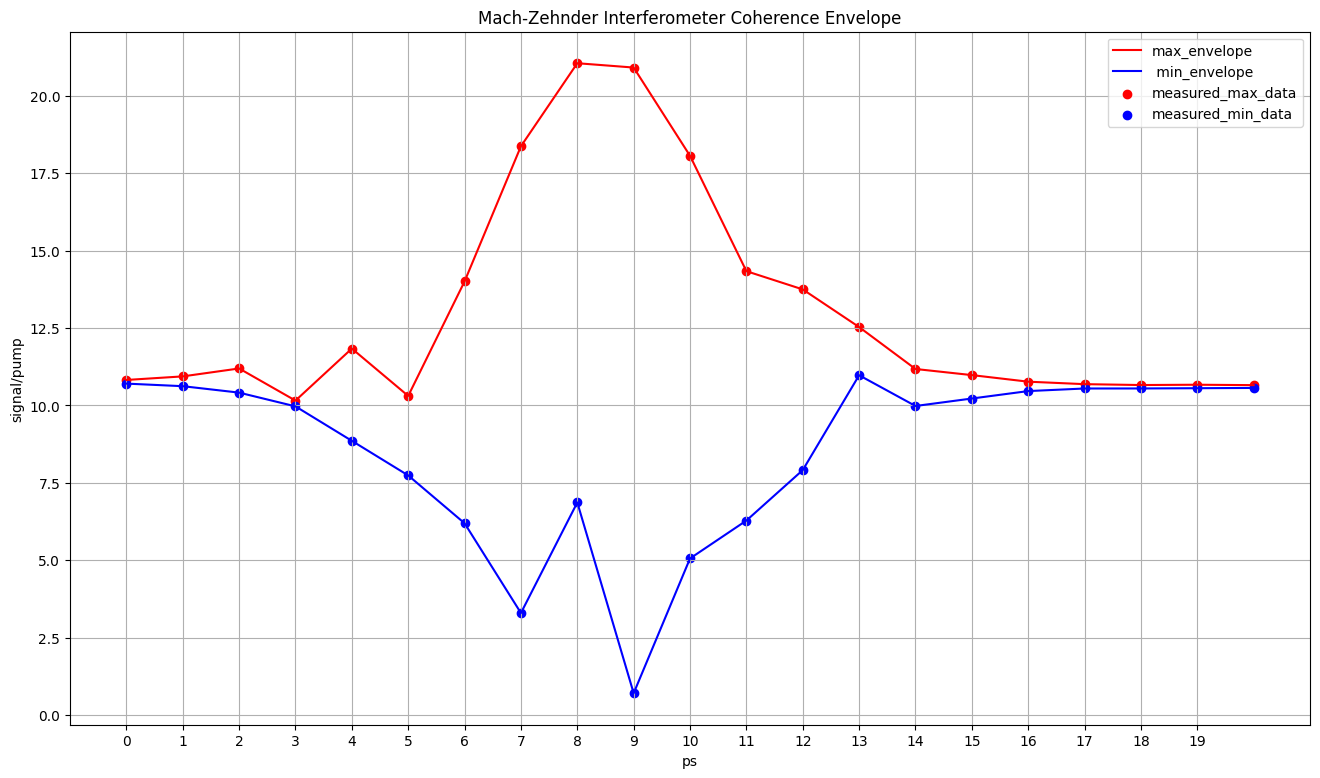

In [140]:
plt.figure(figsize = (16,9))

x = np.linspace(0, 20, 21)
plt.plot(x, max_list, c= 'r', label = 'max_envelope')
plt.plot(x, min_list, c = 'b', label = ' min_envelope')
plt.scatter(x, max_list, c= 'r', label = 'measured_max_data')
plt.scatter(x, min_list, c= 'b', label = 'measured_min_data')

plt.xticks(np.arange(0, 20, 1))
plt.xlabel('ps')
plt.ylabel("signal/pump")
plt.title("Mach-Zehnder Interferometer Coherence Envelope")

plt.grid()
plt.legend()
plt.show()

## 3, 5, 8, 13 PS 재측정 후 보정한 그림

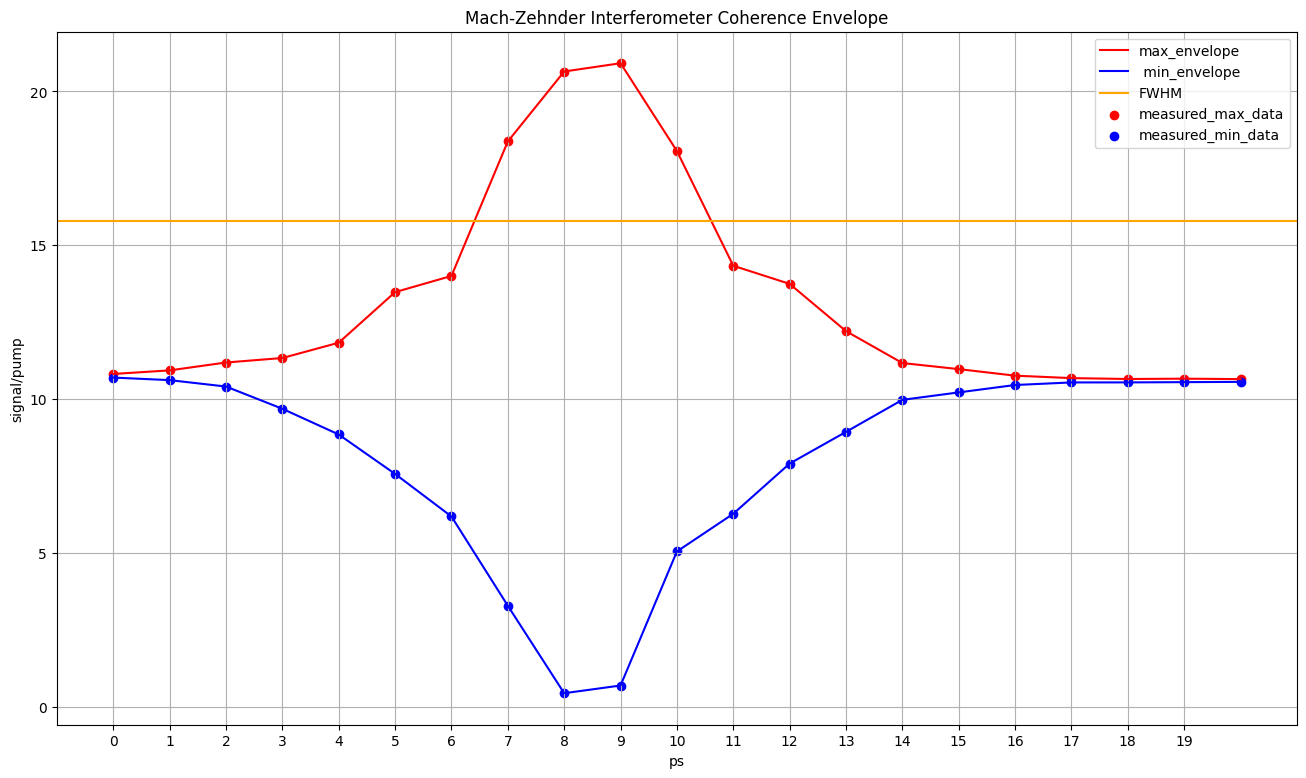

In [174]:
ps = 0

max_no_corr = []
min_no_corr = []
max_list = []
min_list = []

while (ps <= 20):
    if ps in [3, 5, 8, 13]:
        file_name = f"MZ_{ps}_adj.csv"
    else:
        file_name = f"MZ_{ps}.csv"
    
    df = pd.read_csv(file_name, encoding = 'utf-8', header =12)
    df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
    df.rename(columns = {"Power (W)" : "signal",
                         "Power (W).1" : 'pump'}, inplace = True)
    df['signal_per_pump'] = df['signal']/df['pump']
    
    sigpmp_max_idx = df.signal_per_pump.idxmax()
    sigpmp_min_idx = df.signal_per_pump.idxmin()
    max = df.iloc[sigpmp_max_idx].signal_per_pump
    min = df.iloc[sigpmp_min_idx].signal_per_pump

    max_no_corr.append(df.signal.max())
    min_no_corr.append(df.signal.min())
    
    max_list.append(max)
    min_list.append(min)
    

    ps += 1


plt.figure(figsize = (16,9))

x = np.linspace(0, 20, 21)
plt.plot(x, max_list, c= 'r', label = 'max_envelope')
plt.plot(x, min_list, c = 'b', label = ' min_envelope')
plt.axhline(y=np.min(max_list) +(np.max(max_list) - np.min(max_list)) / 2, color = 'orange', linestyle='-', label='FWHM')
plt.scatter(x, max_list, c= 'r', label = 'measured_max_data')
plt.scatter(x, min_list, c= 'b', label = 'measured_min_data')

plt.xticks(np.arange(0, 20, 1))
plt.xlabel('ps')
plt.ylabel("signal/pump")
plt.title("Mach-Zehnder Interferometer Coherence Envelope")

plt.grid()
plt.legend()
plt.show()

In [166]:
np.min(max_list) +(np.max(max_list) - np.min(max_list)) / 2 

15.784995379463753

## Gaussian fitting

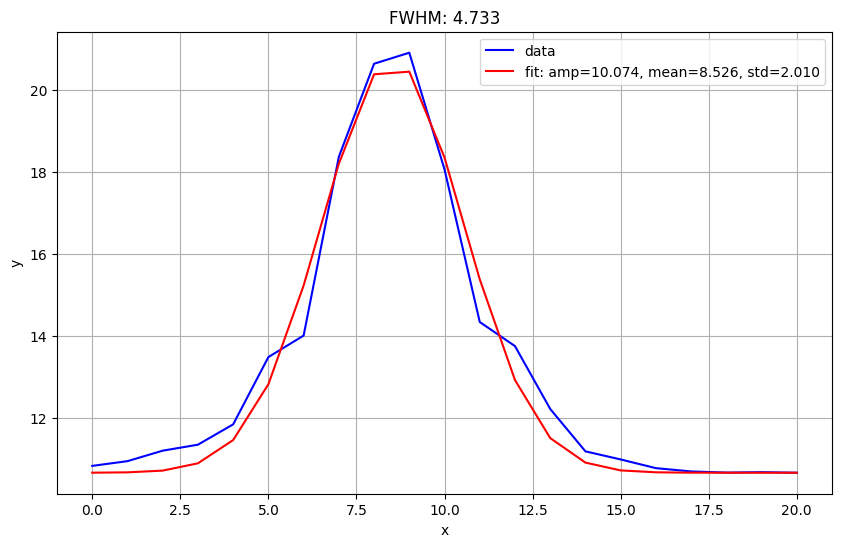

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) + np.min(max_list)
    
# x 값 설정 (0부터 max_list의 길이 - 1까지)
x = np.arange(len(max_list)) # 한 칸 당 2 ps씩 의미하므로

# y 값 설정 (max_list)
y = np.array(max_list)

# 초기 추정값 설정: [최대 y값, x의 평균, x의 표준편차]
p0 = [np.max(y), np.mean(x), np.std(x)]

# 가우시안 피팅
if 1:
    popt, pcov = curve_fit(gaussian, x, y, p0=p0)
    # 피팅된 파라미터 추출
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # FWHM 계산
    FWHM = 2 * np.sqrt(2 * np.log(2)) * stddev_fitted

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x, amplitude_fitted, mean_fitted, stddev_fitted)

    # 그래프 그리기
    plt.figure(figsize = (10,6))
    plt.plot(x, y, 'b-', label='data')
    plt.plot(x, y_fitted, 'r-', label=f'fit: amp={amplitude_fitted:.3f}, mean={mean_fitted:.3f}, std={stddev_fitted:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend(loc = 'best')
    plt.title(f'FWHM: {FWHM:.3f}')
    plt.show()

# except RuntimeError as e:
#     print(f"Error - curve_fit failed: {e}")
# except Exception as e:
#     print(f"Unexpected error: {e}")
